### ASTR 3970 / 8070: Astrostatistics
***S. R. Taylor***
___

# Homework 3
### Due: Saturday, Feb 1st at 11.59pm CST
---

## Only one problem this week

This problem uses a dataset in `/coursework/homeworks/hw_data/`.

1) Read in `hw3_data_1.npy`. This is a (100 x 2) numpy array, with measurements in the first column and uncertainties in the second column. Using the analytic results for heteroscedastic Gaussian data from lectures, compute the sample mean and the standard error on the sample mean from for this data.

2) Reusing some approaches and tools from `Lecture_6`, write a ln-likelihood function for heteroscedastic Gaussian data, and use it in a fitting algorithm to find the best-fit mean. *Remember that scipy optimizers are set up to minimize functions.*

3) Using the same numerical technique from `Lecture_5`, compute the Fisher uncertainty estimate on the mean.

4) Using the bootstrap method, generate $2000$ bootstrap realizations of this dataset. Using an appropriate timing function in python, how long did the generation of these realizations take? 
*DO NOT use the `astroML` code. Write your own bootstrap function from scratch. Also recall that when resampling data, measurements and uncertainties should stay paired together. This code will be graded on efficiency and speed; it should not take more than 1 second to execute.*

5) Repeat (2) with all $2000$ boostrap datasets to find the distribution of the sample mean. How long did this take? Plot a normalized histogram of these bootstrap means, and overplot a Gaussian pdf with the mean and std found in (1). Do these agree?

6) While we have fitted a heteroscedastic Gaussian to this data, let's try something else. Write some code to define a ln-likelihood for a Laplace distribution evaluated on this data. Fit simultaneously for the Laplace location parameter $\mu$ and scale parameter $\Delta$.

7) Compute the AIC values for the heteroscedastic Gaussian model and the Laplacian model. Which model is favored by the data?

8) Using the $2000$ bootstrap datasets from before, fit for the Laplacian $\mu$ and $\Delta$ for each. Make a nice `corner` plot of the distributions of $\mu$ and $\Delta$ that shows both the marginal $1$D distributions and the joint $2$D distribution. Make sure the plot has labels, shows the titles on each $1$D marginal panel, and has $68\%$ and $95\%$ levels.

9) Let's finish with a Fisher uncertainty estimate of the Laplacian parameters. Use the following code to install `numdifftools` which provides a simple way to compute derivatives. We can then compute the Hessian matrix, which is the matrix of the second derivatives of the user's function. This should be computed at the best-fit Laplacian parameters $\mu$ and $\Delta$. To finish, invert the matrix, and then take the square root. The diagonal entries will then be the Fisher uncertainties on $\mu$ and $\Delta$. How does these compare to the bootstrap distribution widths found in (8)?

In [101]:
!pip install numdifftools

In [303]:
#All of the modules needed for the code to work

import numpy as np #Math purposes
from matplotlib import pyplot as plt # To Plot everything
import numdifftools as nd #For problem 9
import os #In case a change in directory is needed
import scipy #Stats
import random #Random Draw
import corner #Creating plot
import math #More Math without any issues 

%matplotlib inline

### Solution

In [307]:
#1, moved the data file to the student folder for easy access (No need to change directories in python)
info = np.load('hw3_data_1.npy')
data1 = info[0:100,0]/(info[0:100,1])**2 #Same form as the equation given
data2 = 1/(info[0:100,1])**2
mu = np.sum(data1)/np.sum(data2)
print('Expected Mean is',mu)
sigmu = np.sqrt(1/np.sum(data2))
print('Expected Stadard Deviation is', sigmu)


Expected Mean is 4.082099776157917
Expected Stadard Deviation is 0.0937975025520293


In [308]:
#2
val = info[0:100,0] #For ease, turned each column into it's own array
sig = info[0:100,1]
L = math.log(1/math.sqrt(math.pi)*2*np.std(val)**2)  #Normalization constant for later use
def LogL(v,m,s):
    return -(L-np.sum(0.5*((v-m)**2/(s**2)))) #This is the log likeliness function as given in lecture
f = lambda mean: LogL(val, mean, sig) #Lambda function to optimize
mean0 = 1 #Guess value
max = scipy.optimize.fmin(f,mean0)
print('The best fit mean is',max[0])



Optimization terminated successfully.
         Current function value: 62.647729
         Iterations: 20
         Function evaluations: 40
The best fit mean is 4.082128906250006


3, We know that fisher matrix gets this:
$$\sigma_{\mu} = \left( - \frac{\partial^2\ln L(\mu)}{\partial\mu^2}\Biggr\rvert_{\hat \mu}\right)^{-1/2}$$


We know that the log likliness is equal to the zscore squared. And that the second derivative of that being $-1/\sigma^2$, so taking the sum with each uncertainty gets the value:

In [309]:
Fisher=np.sqrt(np.sum(1/sig**2))**-1 #Computation
print('Error of Mean',Fisher)

Error of Mean 0.0937975025520293


SRT: Correct. But the technique in Lecture 5 does this numerically through finite difference calculation on a grid. Useful for when you can't easily take the analytic derivative. -1 point.

In [7]:
def bootstrap(n,dat):
    a = 0 #Set the while loop up
    boots = []
    while a < n:
        boots.append(random.choices(dat,k=len(dat))) #Allows Replacement
        a += 1
    return boots #Note that it defines it effectively instantly 

In [8]:
#4
n = 2000
Boot = bootstrap(2000,info)
Boot = np.array(Boot) #Making the list takes less than 0.2 seconds

In [300]:
#5
a = 0
mus = []
while a<n:
    f = lambda mean: LogL(Boot[a,0:100,0], mean, Boot[a,0:100,1])
    mus.append(scipy.optimize.fmin(f,2)[0])
    a+=1
#The averages take less than a second first try, now took over 1.6 seconds, may be due to processing power

Optimization terminated successfully.
         Current function value: 57.814881
         Iterations: 18
         Function evaluations: 36
Optimization terminated successfully.
         Current function value: 53.833930
         Iterations: 18
         Function evaluations: 36
Optimization terminated successfully.
         Current function value: 78.892037
         Iterations: 18
         Function evaluations: 36
Optimization terminated successfully.
         Current function value: 66.254875
         Iterations: 18
         Function evaluations: 36
Optimization terminated successfully.
         Current function value: 62.552272
         Iterations: 18
         Function evaluations: 36
Optimization terminated successfully.
         Current function value: 52.316480
         Iterations: 18
         Function evaluations: 36
Optimization terminated successfully.
         Current function value: 62.248988
         Iterations: 18
         Function evaluations: 36
Optimization terminated suc

[np.float64(3.9171875000000043), np.float64(4.089941406250004), np.float64(4.044433593750005), np.float64(4.147753906250005), np.float64(4.204296875000004), np.float64(4.047363281250005), np.float64(3.999316406250004), np.float64(4.0527343750000036), np.float64(4.184375000000005), np.float64(4.127734375000005), np.float64(4.243750000000006), np.float64(4.042773437500005), np.float64(4.141308593750004), np.float64(4.096679687500005), np.float64(4.166796875000005), np.float64(3.919921875000004), np.float64(4.173046875000004), np.float64(4.172558593750004), np.float64(4.101171875000006), np.float64(3.971093750000004), np.float64(4.093652343750005), np.float64(3.9538085937500047), np.float64(3.9158203125000037), np.float64(4.128515625000006), np.float64(4.056054687500004), np.float64(4.1816406250000036), np.float64(3.8979492187500044), np.float64(4.129882812500004), np.float64(4.241406250000005), np.float64(3.9835937500000043), np.float64(3.9312500000000044), np.float64(4.112402343750006),

Text(0.5, 1.0, 'Distribution of Means')

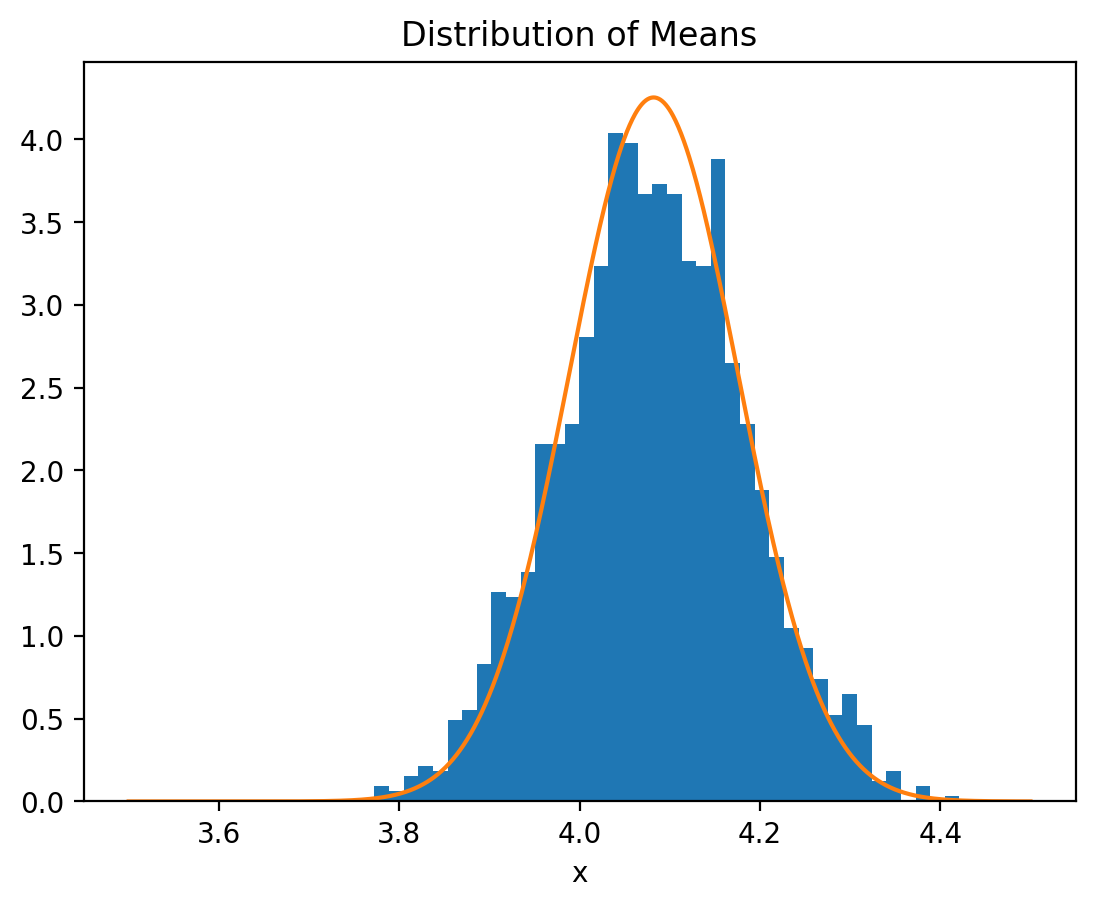

In [301]:
#5
plt.hist(mus,40, density = True) #Well described histogram
dist = scipy.stats.norm(mu,sigmu) #Creating the pdf plot
xgrid = np.linspace(3.5,4.5,1000)
y = dist.pdf(xgrid)
plt.plot(xgrid,y)
plt.xlabel('x')
plt.title('Distribution of Means')
 #The distribution fits fairly well


SRT: Very good!

In [310]:
#6
def LogLap(v,m,s):
    return -(100*np.log(1/(2*s))-np.sum(np.abs(v-m)/(s))) #Negative to Find Minimum, and must include the first term to find the standard deviation, the 100 is due to there being 100 data points 
f_squared = lambda beta: LogLap(val, beta[0], beta[1]) #Two values are wanted, the spread and the location
beta0 = (1, 0.5) #Guess values
muSig = scipy.optimize.fmin(f_squared, beta0) 
print('Fitted values are', muSig)

Optimization terminated successfully.
         Current function value: 161.631942
         Iterations: 66
         Function evaluations: 127
Fitted values are [4.0889552  0.92604934]


SRT: Good

In [312]:
#7
def AIC(k,N,L):
    A = -2*L+2*k+(2*k*(k+1))/(N-k-1)
    return A
N = 100
print('Gauss',AIC(2,N,-LogL(val,max,sig)))
print('Laplace',AIC(2,N,-LogLap(val,muSig[0],muSig[1])))
#Gaussian is a better fit due to having a smaller value

Gauss 129.4191687570345
Laplace 327.38759523958515


SRT: The answer is correct, but for the wrong reason. Your definition of the Gaussian likelihood above should have the `2*np.std(val)**2` under the square root also. It should be what I have below. -2 points

Also, the number of parameters being varied in the Gaussian likelihood is only 1, i.e., the mean. -2 points

In [ ]:
L = math.log(1/math.sqrt(math.pi*2*np.std(val)**2))  #Normalization constant for later use
def LogL(v,m,s):
    return -(L-np.sum(0.5*((v-m)**2/(s**2)))) #This is the log likeliness function as given in lecture

In [314]:
#8
dis = [] #Same structure as the previous loop, however since the actual code takes longer, this while loop should also take longer as well
a = 0
while a<n:
    f_l = lambda beta: LogLap(Boot[a,0:100,0], beta[0],beta[1])
    gi = scipy.optimize.fmin(f_l,beta0)
    dis.append([gi[0],gi[1]]) #needed to be done this way otherwise it would be considered an array
    a+=1

/var/folders/tc/syqns4sx18gckcc8k7ns3vdw0000gn/T/ipykernel_57963/248995124.py:2: RuntimeWarning: invalid value encountered in log
  return -(100*np.log(1/(2*s))-np.sum(np.abs(v-m)/(s))) #Negative to Find Minimum, and must include the first term to find the standard deviation, the 100 is due to there being 100 data points


Optimization terminated successfully.
         Current function value: 163.459851
         Iterations: 68
         Function evaluations: 129
Optimization terminated successfully.
         Current function value: 156.359270
         Iterations: 68
         Function evaluations: 129
Optimization terminated successfully.
         Current function value: 177.738205
         Iterations: 69
         Function evaluations: 129
Optimization terminated successfully.
         Current function value: 162.578930
         Iterations: 53
         Function evaluations: 105
Optimization terminated successfully.
         Current function value: 160.958646
         Iterations: 62
         Function evaluations: 121
Optimization terminated successfully.
         Current function value: 152.699111
         Iterations: 58
         Function evaluations: 111
Optimization terminated successfully.
         Current function value: 162.275472
         Iterations: 63
         Function evaluations: 118
Optimization 

Text(0.66, 470, 'and 95% Interval')

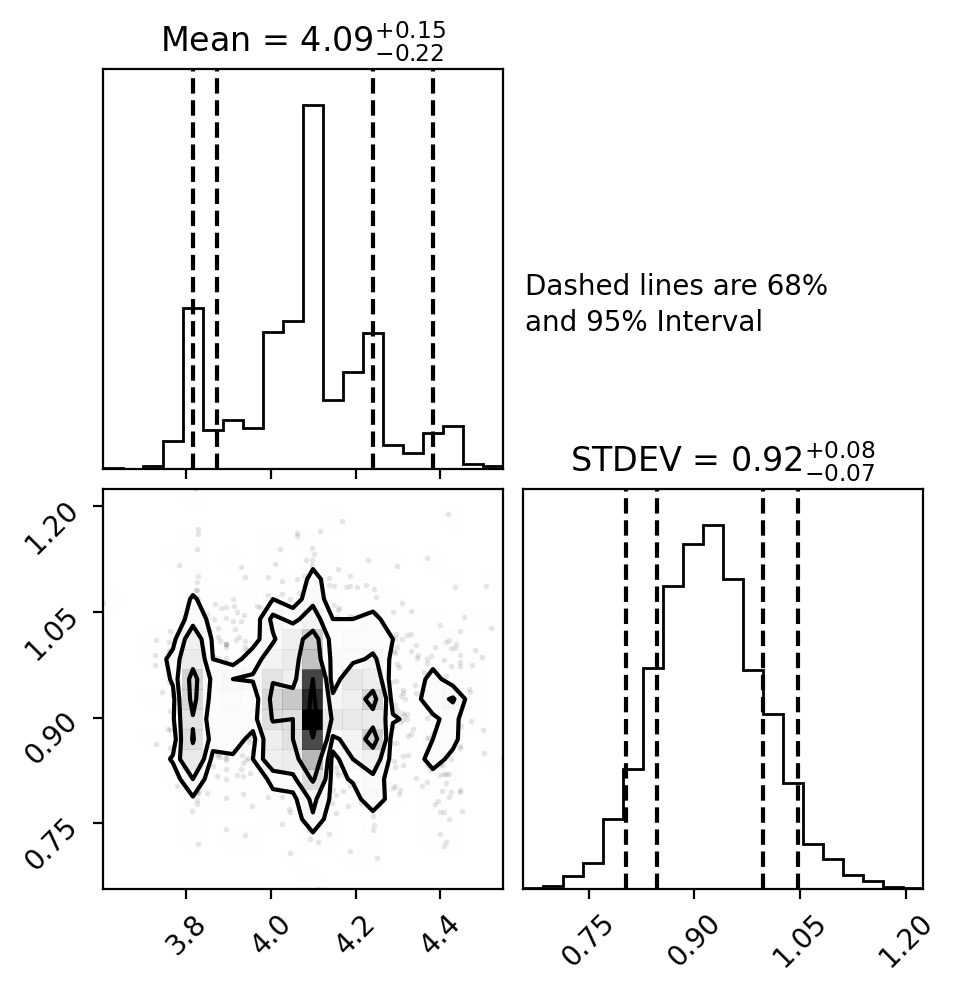

In [330]:
dis = np.array(dis) #Needs to be numpy array otherwise would not work
fig= corner.corner(dis, quantiles=(0.05,0.16, 0.84,0.95), titles=['Mean', 'STDEV', 'Total'], show_titles=True, title_quantiles=(0.16,0.5,0.84))
plt.text(0.66,500,'Dashed lines are 68%') 
plt.text(0.66,470,'and 95% Interval')


In [220]:
#9 Code given in problem, executed with values given
H = nd.Hessian(f_squared)([muSig[0],muSig[1]])
sigma_laplace = np.linalg.inv(H)**0.5

/var/folders/tc/syqns4sx18gckcc8k7ns3vdw0000gn/T/ipykernel_57963/1967607894.py:2: RuntimeWarning: invalid value encountered in sqrt
  sigma_laplace = np.linalg.inv(H)**0.5


In [226]:
print((sigma_laplace))
#Very similar to the widths of the graphs, though not exact


[[0.1164258         nan]
 [       nan 0.09260532]]


SRT: Gaussian approximation, so exact match unexpected. Good work